In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [627]:
lam = 120
mu = 60

E = np.array([
    [lam + 2 * mu, lam, 0],
    [lam, lam + 2 * mu, 0],
    [0, 0, mu]
])

In [628]:
B = np.array([
    [-1, 0, 1, 0, 0, 0],
    [0, -1, 0, 0, 0, 1],
    [-1, -1, 0, 1, 1, 0]
])

In [629]:
k = np.transpose(B) @ E @ B
k

array([[ 300,  180, -240,  -60,  -60, -120],
       [ 180,  300, -120,  -60,  -60, -240],
       [-240, -120,  240,    0,    0,  120],
       [ -60,  -60,    0,   60,   60,    0],
       [ -60,  -60,    0,   60,   60,    0],
       [-120, -240,  120,    0,    0,  240]])

In [630]:
np.linalg.matrix_rank(k)

3

In [752]:
A_1 = np.array([
    [[1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0]],
    [[0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0]]
])

A_2 = np.array([
    [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]],

    [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]],

    [[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]],

    [[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
])

A_1.shape, A_2.shape

((2, 3, 4), (4, 4, 10))

In [753]:
zeros = np.zeros_like(A_1)
ACon = A_1[:, None, :, :] @ A_2[None, :, :, :]
ACon = ACon.reshape(-1, 10)
A = np.zeros((ACon.shape[0] * 2, ACon.shape[1] * 2))
for i1 in range(ACon.shape[0]):
    for i2 in range(ACon.shape[1]):
        A[2*i1, 2*i2] = ACon[i1, i2]
        A[2*i1 + 1, 2*i2 + 1] = ACon[i1, i2]
A = A.reshape(-1, 6, 20)
A.shape

(8, 6, 20)

In [804]:
Field = np.array([
    [False, True, False],
    [False, True, False],
    [False, True, True],
    [False, True, False],
])

counter = 0
positionsIn = []

edgesOnRectangle = np.array([(0, 0), (1, 0), (1, 1), (0, 1)])

for x in range(Field.shape[0]):
    for y in range(Field.shape[1]):
        if Field[x, y]:
            for edge in edgesOnRectangle:
                pos = edge + (x, y)
                pos = (pos[0], pos[1])
                if pos not in positionsIn:
                    counter += 1
                    positionsIn.append(pos)

edgesToAdd = np.array([
    [(0, 0), (1, 0), (0, 1)],
    [(1, 1), (0, 1), (1, 0)]
    ])
A = []
for x in range(Field.shape[0]):
    for y in range(Field.shape[1]):
        if Field[x, y]:
            for triangle in edgesToAdd:
                for edge in triangle:
                    pos = edge + (x, y)
                    pos = (pos[0], pos[1])
                    i = positionsIn.index(pos)
                    row = np.zeros(counter * 2)
                    row[2 * i] = 1
                    A.append(row)
                    row = np.zeros(counter * 2)
                    row[2 * i + 1] = 1
                    A.append(row)
A = np.array(A)
A = A.reshape(A.shape[0] // 6, 6, A.shape[1])
A.shape

(10, 6, 24)

In [805]:
KGlob = (A.transpose((0, 2, 1)) @ k[None, :, :] @ A).sum(0)
# KGlob = KGlob.reshape(-1, 20)
KGlob = np.concatenate([KGlob,[
    [1, 0, 0] + [0] * (KGlob.shape[1] - 3),
    [0, 1, 0] + [0] * (KGlob.shape[1] - 3),
    [0, 0, 0, 1] + [0] * (KGlob.shape[1] - 4)
    ]], axis=0)
KGlob.shape

(27, 24)

In [806]:
np.linalg.matrix_rank(KGlob)

24

In [835]:
A = A.reshape(-1, KGlob.shape[1])
f = np.zeros(A.shape[1])
f[18] = 100
# f = A.transpose() @ f
f = np.concatenate((f, [0, 0, 0]), axis=0)
# f[15] = 100
# f[19] = -50
# f[4] = -300
# f = A.transpose((0, 2, 1)) @ f 
print(KGlob.shape, f.shape)
eps, residuals, rank, eigen = np.linalg.lstsq(KGlob, f)
epsBack = eps
eps, residuals, rank, eigen

(27, 24) (27,)


(array([ 5.23918179e-12,  5.64225822e-12, -1.96923327e-02, -5.14665488e-12,
         1.83666665e-01,  1.45376868e-02,  1.21136273e-01,  1.95033047e-02,
        -9.40471464e-02, -9.17976655e-02,  3.54527544e-01, -5.99132640e-02,
        -1.67056060e-01, -8.73199575e-01,  3.77066747e-01, -9.63523099e-01,
         1.84143124e+00, -9.75810848e-01,  2.00624115e+00,  3.94863186e-02,
        -1.07628693e-01, -1.26179107e+00,  2.76809922e-01, -1.20952574e+00]),
 array([1408.48670757]),
 24,
 array([2.16172322e+03, 1.54467394e+03, 1.24754464e+03, 1.07276721e+03,
        8.72778509e+02, 7.98210613e+02, 6.98124758e+02, 6.33422342e+02,
        4.90794398e+02, 4.69055588e+02, 3.26610805e+02, 3.19423813e+02,
        2.71376998e+02, 2.46716147e+02, 2.42655465e+02, 1.89120034e+02,
        1.85006672e+02, 9.57545826e+01, 7.23939939e+01, 3.94361790e+01,
        2.24197483e+01, 6.13360720e-01, 2.99673468e-01, 8.69640213e-02]))

In [836]:
from scipy.linalg import null_space
# nullSp = 2.88675135e-01 - null_space(KGlob)[:, 0]
nullSp = null_space(KGlob)
print(nullSp.shape)
nullSp = nullSp[:, 0]
nullSp 

(24, 0)


IndexError: index 0 is out of bounds for axis 1 with size 0

In [837]:
np.linalg.norm(KGlob @ (eps) - f)

37.52981091834144

In [838]:
epsBack.shape, nullSp.shape

((24,), (24, 0))

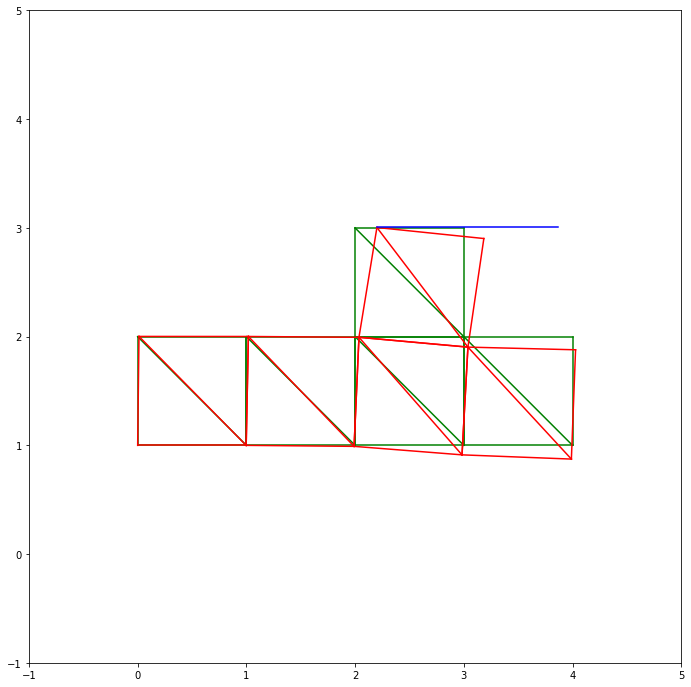

In [839]:
eps = epsBack

positions = [
    (0, 0), (1, 0), (2, 0), (3, 0), (4, 0),
    (0, 1), (1, 1), (2, 1), (3, 1), (4, 1),
]

positions = positionsIn

squares = [
    [0, 1, 6, 5, 0],
    [1, 2, 7, 6, 1],
    [2, 3, 8, 7, 2],
    [3, 4, 9, 8, 3]
]
squares = []
for x in range(Field.shape[0]):
    for y in range(Field.shape[1]):
        if Field[x, y]:
            row = []
            for edge in edgesOnRectangle:
                pos = edge + (x, y)
                pos = (pos[0], pos[1])
                i = positionsIn.index(pos)
                row.append(i)
            row.append(row[0])
            squares.append(row)
scale = 0.1
plt.figure(figsize=(12, 12))
for square in squares:
    for i in range(4):
        startI = square[i]
        endI = square[i + 1]
        plt.plot(
            [positions[startI][0], positions[endI][0]],
            [positions[startI][1], positions[endI][1]],
            color='g'
            )
    startI = square[1]
    endI = square[3]
    plt.plot(
        [positions[startI][0], positions[endI][0]],
        [positions[startI][1], positions[endI][1]],
            color='g'
        )
for square in squares:
    for i in range(4):
        startI = square[i]
        endI = square[i + 1]
        plt.plot(
            [positions[startI][0] + eps[2 * startI]*scale, positions[endI][0] + eps[2 * endI]*scale],
            [positions[startI][1] + eps[2 * startI + 1]*scale, positions[endI][1] + eps[2 * endI + 1]*scale],
            color='r'
            )
    startI = square[1]
    endI = square[3]
    plt.plot(
        [positions[startI][0] + eps[2 * startI]*scale, positions[endI][0] + eps[2 * endI]*scale],
        [positions[startI][1] + eps[2 * startI + 1]*scale, positions[endI][1] + eps[2 * endI + 1]*scale],
            color='r'
        )
plt.xlim([-1, 5])
plt.ylim([-1, 5])
plt.gca().set_aspect(1)

for i in range(len(positions)):
    pos = np.array(positions[i]) + [eps[2 * i]*scale, eps[2 * i + 1]*scale]
    plt.plot([pos[0], pos[0] + f[2 * i] / 60.], [pos[1], pos[1]], color='b')
    plt.plot([pos[0], pos[0]], [pos[1], pos[1] + f[2 * i + 1] / 60.], color='b')

In [840]:
positionsIn

[(0, 1),
 (1, 1),
 (1, 2),
 (0, 2),
 (2, 1),
 (2, 2),
 (3, 1),
 (3, 2),
 (3, 3),
 (2, 3),
 (4, 1),
 (4, 2)]

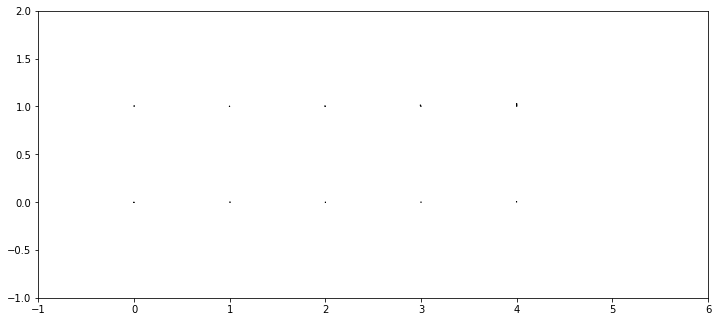

In [795]:
positions = [
    (0, 0), (1, 0), (2, 0), (3, 0), (4, 0),
    (0, 1), (1, 1), (2, 1), (3, 1), (4, 1),
]
scale = 0.1
plt.figure(figsize=(12, 12))
for i in range(10):
    plt.arrow(*positions[i], eps[2 * i]*scale, eps[2 * i + 1]*scale, length_includes_head=True)
plt.xlim([-1, 6])
plt.ylim([-1, 2])
plt.gca().set_aspect(1)

In [771]:
q = eps # naming error

In [772]:
q.shape

(24,)

In [773]:
E.shape

(3, 3)

In [774]:
B.shape

(3, 6)

In [775]:
A.shape

(60, 24)

In [776]:
sigma = E[None, :] @ B[None, :] @ A.reshape(A.shape[0] // 6, 6, A.shape[1]) @ q
sigma.shape

(10, 3)

In [777]:
sigma

array([[ -7.20071538,   2.00173861,   6.97065403],
       [ -7.04734115, -11.77454534, -10.97413124],
       [-28.03157215,  -5.76491131,   9.62666417],
       [-27.72482368, -34.6151645 , -25.64940945],
       [-33.05737133,   4.224067  , -20.85367162],
       [  9.19735602,   2.6740975 ,  18.02669648],
       [ 33.35901394,  82.43864242,   8.4355907 ],
       [ -8.81902629,  -1.15031463,   9.20246187],
       [ -6.4174576 ,  -1.28414829,  -8.8432786 ],
       [ -6.57083183,   1.09787982,   6.64751895]])

In [778]:
sigma_v = np.sqrt(sigma[:, 0] ** 2 + sigma[:, 1] ** 2 + sigma[:, 0] * sigma[:, 1] + 3 * (sigma[:, 2] ** 2))
sigma_v

array([ 13.68259341,  25.15112011,  35.47704548,  70.00179576,
        47.70348886,  33.03365163, 104.27129504,  18.52833011,
        16.90220385,  13.02826588])